In [3]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('/content/Financial.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [4]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

None

,0
gender,0
age,0
Investment_Avenues,0
Mutual_Funds,0
Equity_Market,0
Debentures,0
Government_Bonds,0
Fixed_Deposits,0
PPF,0
Gold,0


In [5]:
df['Total_Investment'] = df['Mutual_Funds'] + df['Equity_Market']
display(df[['Mutual_Funds', 'Equity_Market', 'Total_Investment']].head())

,Mutual_Funds,Equity_Market,Total_Investment
0,1,2,3
1,4,3,7
2,3,6,9
3,2,1,3
4,2,1,3


In [6]:
df['Mutual_Funds_Ratio'] = df['Mutual_Funds'] / df['Total_Investment']
display(df[['Mutual_Funds', 'Total_Investment', 'Mutual_Funds_Ratio']].head())

,Mutual_Funds,Total_Investment,Mutual_Funds_Ratio
0,1,3,0.333333
1,4,7,0.571429
2,3,9,0.333333
3,2,3,0.666667
4,2,3,0.666667


In [7]:
average_total_investment = df['Total_Investment'].mean()
average_mutual_funds_ratio = df['Mutual_Funds_Ratio'].mean()

print(f"Average Total Investment: {average_total_investment}")
print(f"Average Mutual Funds Ratio: {average_mutual_funds_ratio}")

Average Total Investment: 6.025
Average Mutual Funds Ratio: 0.4199603174603174


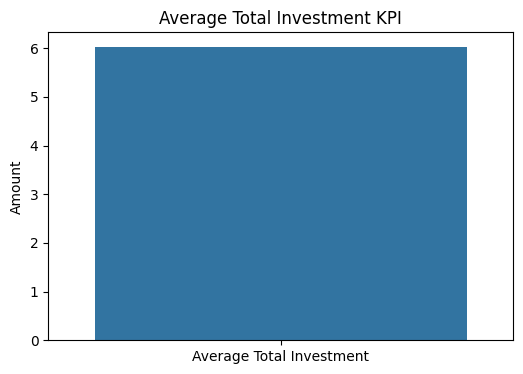

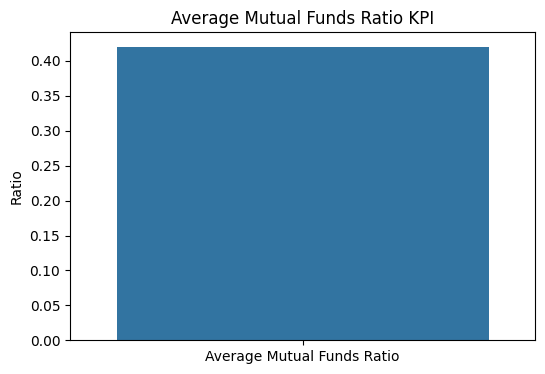

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for average_total_investment
plt.figure(figsize=(6, 4))
sns.barplot(x=['Average Total Investment'], y=[average_total_investment])
plt.title('Average Total Investment KPI')
plt.ylabel('Amount')
plt.show()

# Create a bar plot for average_mutual_funds_ratio
plt.figure(figsize=(6, 4))
sns.barplot(x=['Average Mutual Funds Ratio'], y=[average_mutual_funds_ratio])
plt.title('Average Mutual Funds Ratio KPI')
plt.ylabel('Ratio')
plt.show()

In [9]:
# Choose a categorical column and a specific value to filter by
filter_column = 'gender'
filter_value = 'Female'

# Filter the DataFrame
filtered_df = df[df[filter_column] == filter_value].copy()

# Recalculate KPIs on the filtered DataFrame
filtered_average_total_investment = filtered_df['Total_Investment'].mean()
filtered_average_mutual_funds_ratio = filtered_df['Mutual_Funds_Ratio'].mean()

# Print the recalculated KPI values
print(f"Recalculated KPIs for {filter_column} = {filter_value}:")
print(f"Average Total Investment: {filtered_average_total_investment}")
print(f"Average Mutual Funds Ratio: {filtered_average_mutual_funds_ratio}")

Recalculated KPIs for gender = Female:
Average Total Investment: 6.066666666666666
Average Mutual Funds Ratio: 0.44037037037037036


In [10]:
demographic_kpis = df.groupby(['gender', 'age'])[['Total_Investment', 'Mutual_Funds_Ratio']].mean()
display(demographic_kpis)

Total_Investment  Mutual_Funds_Ratio
gender age                                      
Female 21           3.000000            0.333333
       23           7.000000            0.571429
       24           7.000000            0.527778
       25           5.000000            0.400000
       26           5.000000            0.400000
       27           9.000000            0.333333
       28           5.000000            0.500000
       31           6.000000            0.333333
       32           7.000000            0.428571
       34           6.000000            0.444444
       35           6.000000            0.333333
Male   21           5.000000            0.400000
       22           3.000000            0.666667
       25           7.500000            0.444444
       26           6.333333            0.419048
       27           6.166667            0.434392
       29           6.000000            0.438095
       30           6.666667            0.288889
       31           5.000000            0.327778
       35           6.000000            0.333333

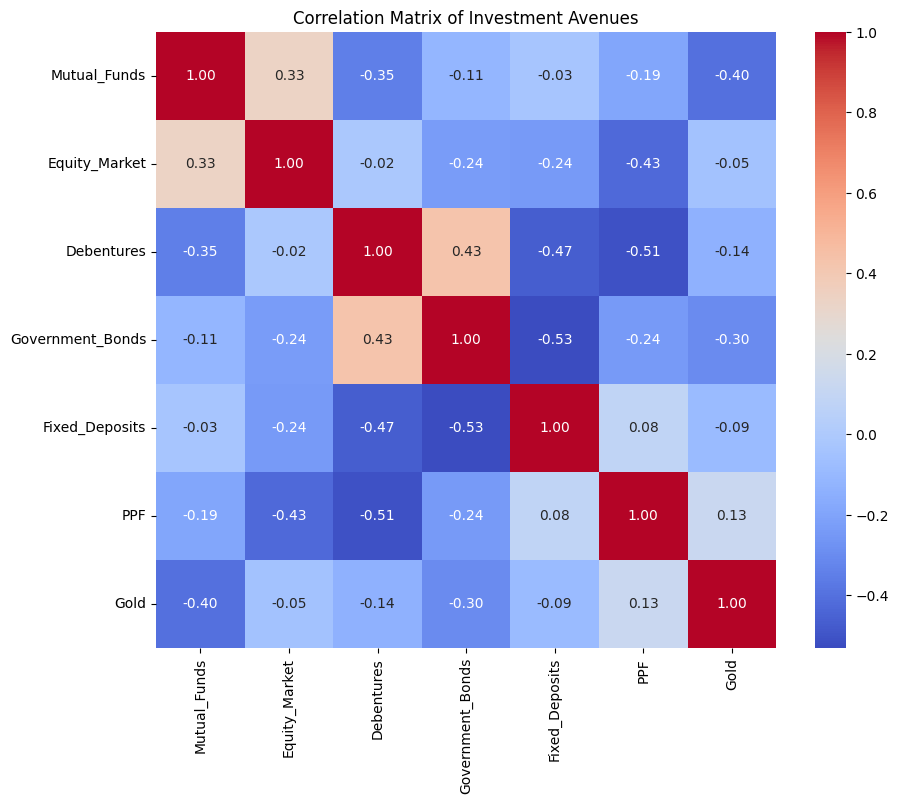

In [11]:
# Select the investment avenue columns
investment_avenues_df = df[['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']]

# Calculate the correlation matrix
correlation_matrix = investment_avenues_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Investment Avenues')
plt.show()

In [12]:
# Group by savings objectives and calculate the mean investment in each avenue
savings_investment_mapping = df.groupby('What are your savings objectives?')[[
    'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds',
    'Fixed_Deposits', 'PPF', 'Gold'
]].mean()

display(savings_investment_mapping)

,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
What are your savings objectives?,,,,,,,
Education,2.333333,3.333333,3.333333,3.333333,4.333333,4.666667,6.666667
Health Care,2.461538,3.461538,6.153846,4.923077,3.076923,1.769231,6.153846
Retirement Plan,2.625000,3.500000,5.833333,4.666667,3.750000,1.833333,5.791667


In [13]:
# Group by expected returns and calculate the mean investment in each avenue
expected_returns_investment_mapping = df.groupby('Expect')[[
    'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds',
    'Fixed_Deposits', 'PPF', 'Gold'
]].mean()

display(expected_returns_investment_mapping)

,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
Expect,,,,,,,
10%-20%,3.666667,3.333333,2.333333,3.666667,6.666667,2.666667,5.666667
20%-30%,2.312500,3.437500,5.968750,4.656250,3.406250,2.000000,6.218750
30%-40%,3.400000,3.800000,6.400000,5.200000,2.800000,1.800000,4.600000


## Investment Monitoring Frequency Analysis


In [14]:
# Group by investment monitoring frequency and calculate the mean of relevant columns
monitoring_frequency_analysis = df.groupby('Invest_Monitor')[[
    'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds',
    'Fixed_Deposits', 'PPF', 'Gold', 'Total_Investment', 'Mutual_Funds_Ratio'
]].mean()

display(monitoring_frequency_analysis)

,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,Total_Investment,Mutual_Funds_Ratio
Invest_Monitor,,,,,,,,,
Daily,3.500000,3.250000,3.500000,5.250000,4.500000,2.750000,5.250000,6.750000,0.562500
Monthly,2.517241,3.517241,6.137931,4.655172,3.413793,1.827586,5.931034,6.034483,0.410701
Weekly,2.142857,3.428571,5.428571,4.285714,3.714286,2.428571,6.571429,5.571429,0.376871


## KPI Gauge: Average % return expectations
Create a KPI gauge for average percentage return expectations.

In [16]:
# Function to convert percentage range to midpoint
def percentage_range_to_midpoint(percentage_range):
    if isinstance(percentage_range, str):
        try:
            # Remove '%' and split by '-'
            parts = percentage_range.replace('%', '').split('-')
            if len(parts) == 2:
                lower_bound = float(parts[0])
                upper_bound = float(parts[1])
                return (lower_bound + upper_bound) / 2
            elif len(parts) == 1:
                return float(parts[0])
        except ValueError:
            pass # Handle cases that don't match the expected format
    return None # Return None for invalid or missing values

# Apply the function to the 'Expect' column to create a new numerical column
df['Expected_Returns_Midpoint'] = df['Expect'].apply(percentage_range_to_midpoint)

# Calculate the average of the numerical expected returns
average_expected_returns = df['Expected_Returns_Midpoint'].mean()

print(f"Average Expected Returns: {average_expected_returns:.2f}%")

# To create a gauge, we can use libraries like plotly.
# Since plotly might require additional setup in some environments,
# we can represent the gauge concept with a simple bar or text for now.

# Simple text representation of a gauge
print("\n--- KPI Gauge (Conceptual) ---")
print(f"Average Expected Returns: {average_expected_returns:.2f}%")
print("-----------------------------")


Average Expected Returns: 25.50%

--- KPI Gauge (Conceptual) ---
Average Expected Returns: 25.50%
-----------------------------
